# Hedging With Options

In this notebook we use Hedging techniques with options as a protection for our assets

## Protective Put

A protective put strategy is built by going on a long position on a stock and simultanuesly buying a put option. 

In these strategy we are going long with BTC and we protect our position from adverse Bitcoin movements. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# For making an attractive and informative statistical graph
plt.style.use('seaborn-darkgrid')

In [2]:
def put_payoff(sT, strike_price, premium ) -> float:
    return np.where(sT < strike_price, strike_price - sT, 0) - premium

In [4]:
# parameters
# BTC current price
spot_price = 58000

# BTC purchase price
btc_purchase_price = 56000

# long put
strike_price_long_put = 60000
premium_long_put = 5900

sT = np.arange(0.5*spot_price, 2*spot_price,1000)



# Long 60K strike put payoff

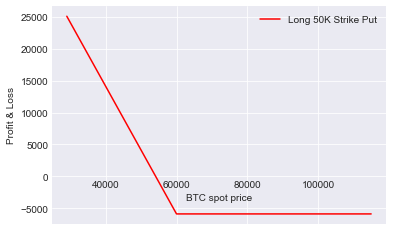

In [5]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
ax = plt.subplot()
ax.spines["bottom"].set_position('zero')
ax.plot(sT, payoff_long_put, label = "Long 50K Strike Put", color = "r")
plt.xlabel("BTC spot price")
plt.ylabel("Profit & Loss")
plt.legend()
plt.show()

# Long BTC payoff

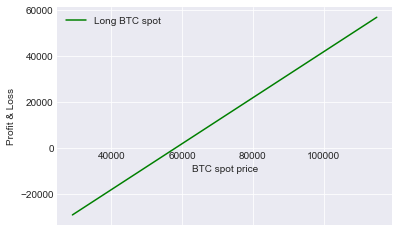

In [7]:
payoff_btc_stock = sT - spot_price

ax = plt.subplot()
ax.spines["bottom"].set_position('zero')
ax.plot(sT, payoff_btc_stock, label = "Long BTC spot", color = "g")
plt.xlabel("BTC spot price")
plt.ylabel("Profit & Loss")
plt.legend()
plt.show()

# Protective Put payoff

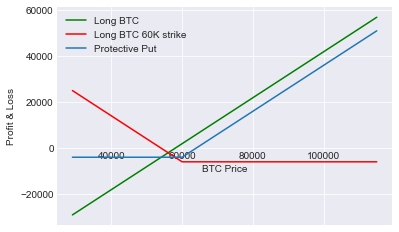

In [14]:
payoff_protective_put = payoff_btc_stock + payoff_long_put

ax = plt.subplot()
ax.spines["bottom"].set_position('zero')
ax.plot(sT, payoff_btc_stock, label = "Long BTC", color = "g")
ax.plot(sT, payoff_long_put, label= "Long BTC 60K strike", color = "r")
ax.plot(sT, payoff_protective_put, label="Protective Put")
plt.xlabel("BTC Price")
plt.ylabel("Profit & Loss")
plt.legend()
plt.show()

In [18]:
max_win = max(payoff_protective_put)
max_loss = min(payoff_protective_put)

print(f'The maximum amount that you can earn is unlimited while the maximun loss that you can take is ${int(max_loss*-1)} ')

The maximum amount that you can earn is unlimited while the maximun loss that you can take is $3900 


## Covered call strategy

This strategy goes long on a stock and simultaneusly selling a call option on that stock. 

When to use it? --> The view of the stock is neutral

## Call payoff

In [2]:
def call_payoff(sT, strike_price, premium) -> float:
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

In [3]:
# Parameters
spot_price = 58000

# short call
strike_price_short_call = 60000
premium_short_call = 5000

# stock price range at expiration of the call
sT = np.arange(0.5*spot_price, 2*spot_price, 1)


## BTC stock payoff

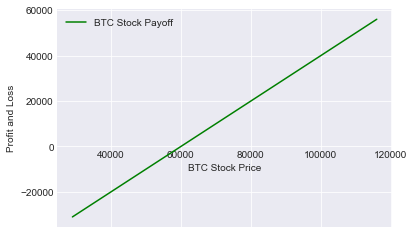

In [4]:
payoff_btc_stock = sT - strike_price_short_call
ax = plt.subplot()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_btc_stock, label = "BTC Stock Payoff", color = "g")
plt.xlabel("BTC Stock Price")
plt.ylabel("Profit and Loss")
plt.legend()
plt.show()

## Short strike Call payoff

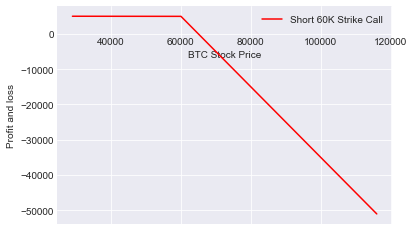

In [5]:
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0
# Plot
ax = plt.subplot()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 60K Strike Call',color='r')
plt.xlabel('BTC Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Covered call payoff

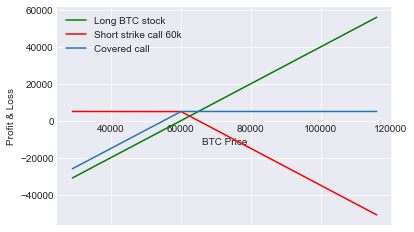

In [6]:
covered_call_payoff = payoff_btc_stock + payoff_short_call
ax = plt.subplot()
ax.spines["bottom"].set_position('zero')
ax.plot(sT, payoff_btc_stock, label = "Long BTC stock", color = "g")
ax.plot(sT, payoff_short_call, label = "Short strike call 60k", color = "r")
ax.plot(sT, covered_call_payoff, label = "Covered call")
plt.xlabel("BTC Price")
plt.ylabel("Profit & Loss")
plt.legend()
plt.show()

In [7]:
print(f'Maximun profit is capped at {max(covered_call_payoff)} the maximun loss is proportional to the fall bellow 60K')

Maximun profit is capped at 5000.0 the maximun loss is proportional to the fall bellow 60K
